In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [3]:
# Cargar el dataset del Titanic
df = pd.read_csv('Titanic-Dataset.csv')

In [5]:
# Visualizar la estructura general del dataset

# Primeras filas
print(df.head())

# Información general del dataset
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [7]:
# Estadísticas descriptivas
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


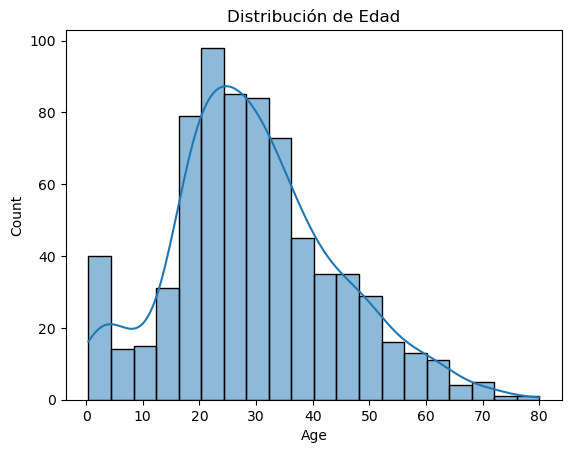

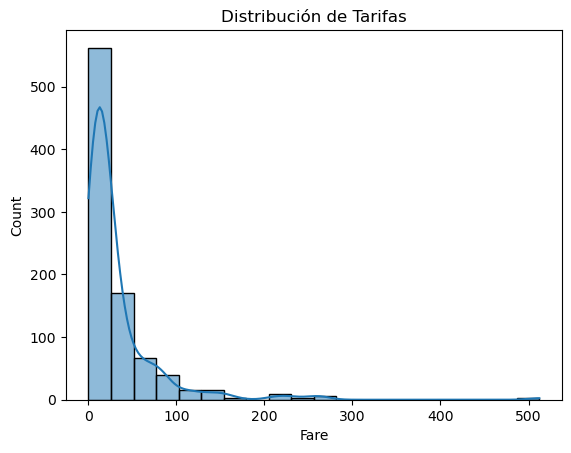

In [9]:
# Crear gráficas de distribución para variables continuas

# Distribución de Age
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribución de Edad')
plt.show()

# Distribución de Fare
sns.histplot(df['Fare'], bins=20, kde=True)
plt.title('Distribución de Tarifas')
plt.show()

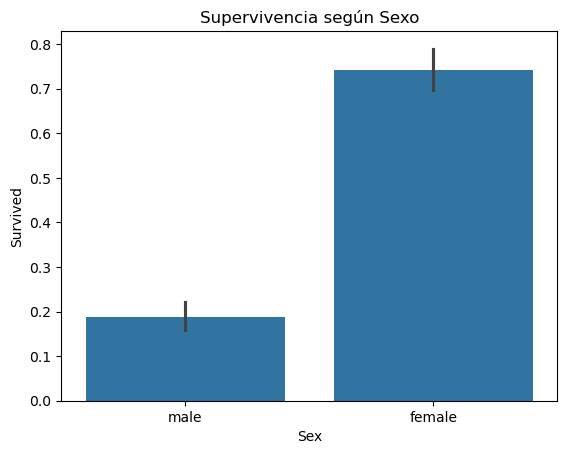

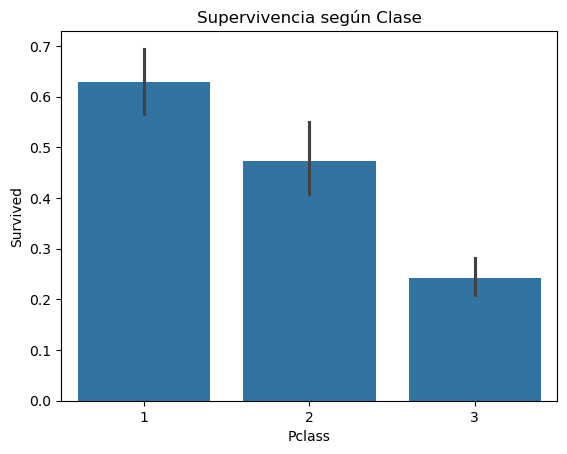

In [11]:
# Relación entre variables independientes y Survived

# Sexo y sobrevivencia
sns.barplot(x='Sex', y='Survived', data=df).set_title('Supervivencia según Sexo')
plt.show()

# Clases y sobrevivencia
sns.barplot(x='Pclass', y='Survived', data=df).set_title('Supervivencia según Clase')
plt.show()

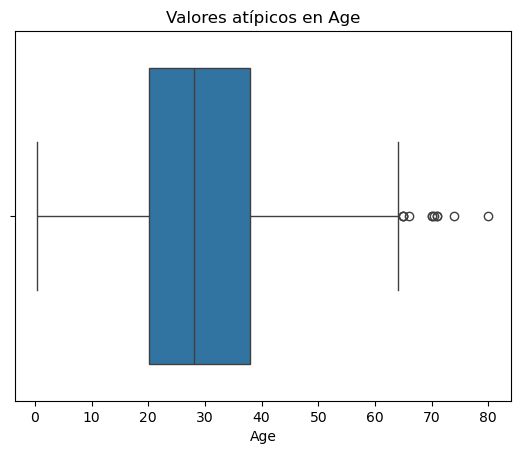

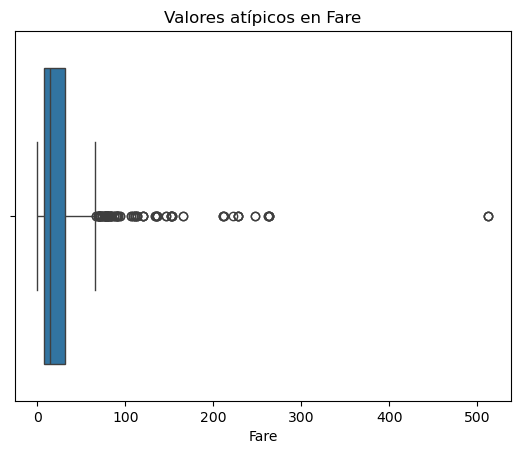

In [13]:
# Detectar y analizar valores atípicos

sns.boxplot(x=df['Age']).set_title('Valores atípicos en Age')
plt.show()

sns.boxplot(x=df['Fare']).set_title('Valores atípicos en Fare')
plt.show()

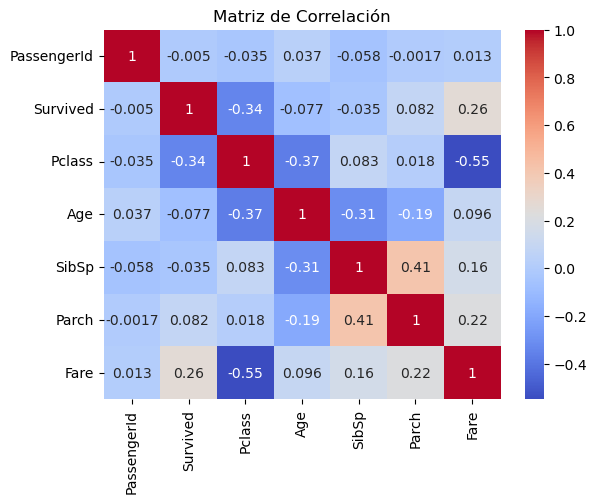

In [15]:
# Correlación entre variables

correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [17]:
# 2. Preprocesamiento de Datos

# Manejar valores faltantes

# Rellenar Age con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# Rellenar Embarked con la moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Eliminar la columna Cabin si existe
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

In [19]:
# Verificar valores faltantes
print(df.isnull().sum())

# Codificar variables categóricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [21]:
# Escalar variables continuas



scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [23]:
# 3. Selección de Características

selected_features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']

In [25]:
# 4. División del Dataset

from sklearn.model_selection import train_test_split

X = df[selected_features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# 5. Entrenamiento del Modelo

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# 6. Evaluación del Modelo

y_pred = model.predict(X_test)

# Métricas
print(f'Precisión: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-Score: {f1_score(y_test, y_pred)}')

Precisión: 0.8100558659217877
Recall: 0.7162162162162162
F1-Score: 0.7571428571428571


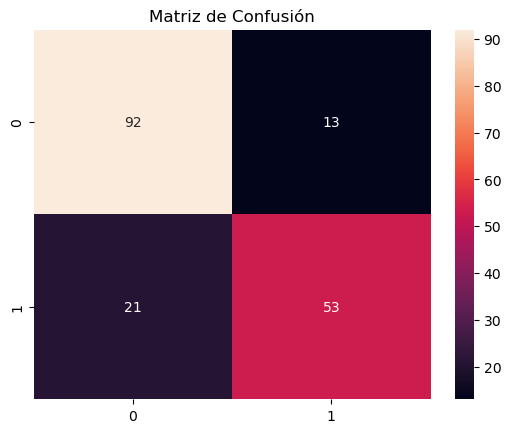

In [31]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d").set_title('Matriz de Confusión')
plt.show()

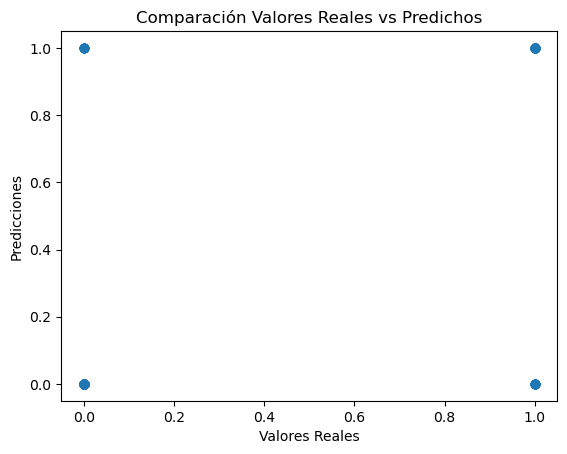

In [33]:
# 7. Visualización de Resultados

# Comparación real vs predicho
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación Valores Reales vs Predichos')
plt.show()

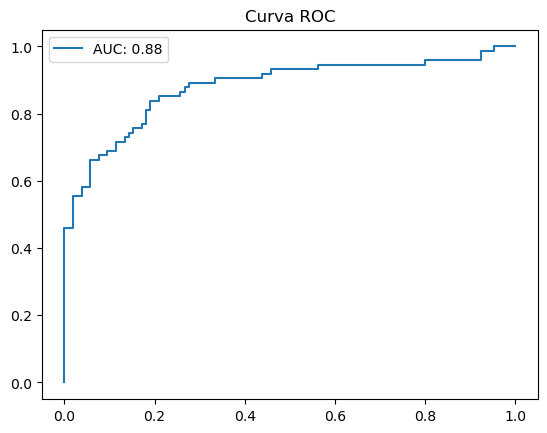

In [35]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.2f}')
plt.title('Curva ROC')
plt.legend()
plt.show()


In [37]:
# Importancia de características
feature_importance = pd.DataFrame({'Feature': selected_features, 'Coeficiente': model.coef_[0]})
print(feature_importance.sort_values(by='Coeficiente', ascending=False))

  Feature  Coeficiente
1     Sex     2.610304
3    Fare     0.167903
5   Parch    -0.124169
4   SibSp    -0.314530
2     Age    -0.404495
0  Pclass    -0.927706


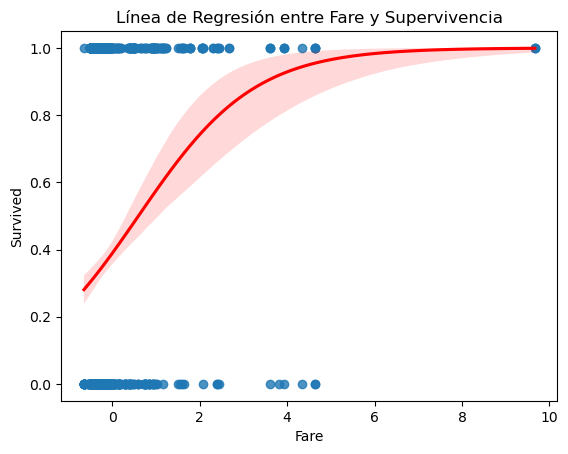

In [39]:
# Crear una gráfica con línea de regresión logística para Fare
sns.regplot(x='Fare', y='Survived', data=df, logistic=True, line_kws={"color": "red"})
plt.title('Línea de Regresión entre Fare y Supervivencia')
plt.show()

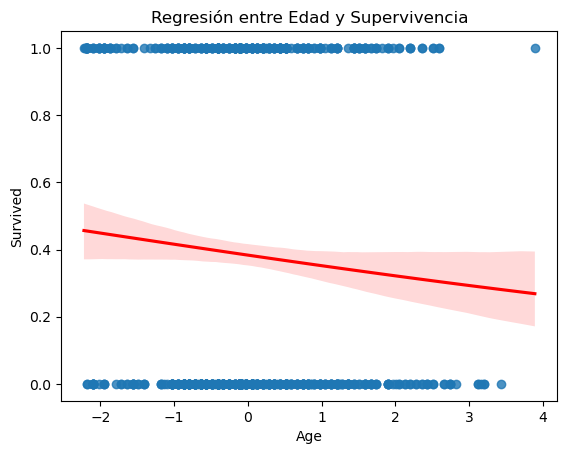

In [41]:
# Gráfica múltiple para comparar una característica con múltiples valores (Pclass vs Survived)
sns.regplot(x='Age', y='Survived', data=df, logistic=True, line_kws={"color": "red"})
plt.title('Regresión entre Edad y Supervivencia')
plt.show()